# Sea Level Predictor

## Overview
This problem is a practice in using `Matplotlib` and `lingress` in `scipy` to predict sea level from the given data. The prediction is divided into 2 sets of data: from 1880 to the latest year and from 2000 to the latest year. Finally, the prediction results of both models are plotted together with the actual data in a single graph as shown below.

![sea_level_predictor](sea_level_plot.png)

# Process

Import libraries

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
print("Success!")

Success!


Use Pandas to import the data from `epa-sea-level.csv`.

In [55]:
df = pd.read_csv("epa-sea-level.csv")
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


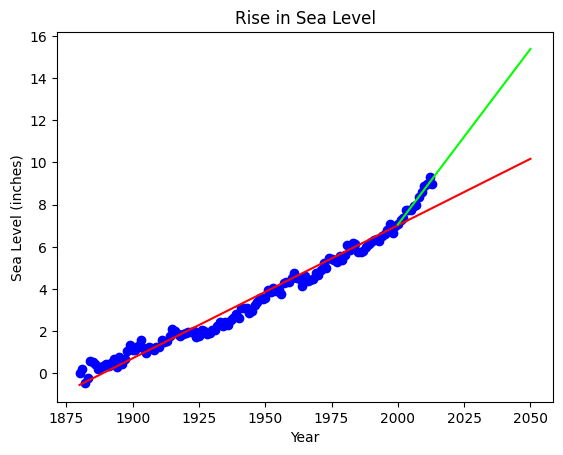

In [56]:
# Use `matplotlib` to create a scatter plot using the `Year`` column as the x-axis and the `CSIRO Adjusted Sea Level` column as the y-axis.
plt.scatter(
        data=df,
        x='Year',
        y='CSIRO Adjusted Sea Level',
        color='blue'
)
# ==========================================================================

# Use the `linregress` function from `scipy.stats` to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

# Run linear regression between Year and CSIRO Adjusted Sea Level and assign it to `reg`
reg = linregress(
        x = df['Year'],
        y = df['CSIRO Adjusted Sea Level']
)

# Calculate the prediction using slope and intercept from `reg`
predicted = pd.Series([y*reg.slope+reg.intercept for y in range(1880,2051,1)])

# Plot the result
plt.plot(
        pd.Series([y for y in range(1880,2051,1)]),
        predicted,
        color="red"
)
# ==========================================================================

# Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

#filter the data 
df2 = df[df['Year']>=2000] 

# Run linear regression between Year and CSIRO Adjusted Sea Level from year 2000 and assign it to `reg2`
reg2 = linregress(
        x = df2['Year'],
        y = df2['CSIRO Adjusted Sea Level']
    )
# Calculate the prediction using slope and intercept from `reg2`
predicted2 = [y*reg2.slope+reg2.intercept for y in range(2000,2051,1)]

# Plot the result
plt.plot(
        pd.Series([y for y in range(2000,2051,1)]),
        predicted2,
        color="lime"
)
# ==========================================================================

# Add labels and title
plt.title("Rise in Sea Level")
plt.ylabel("Sea Level (inches)")
plt.xlabel("Year")

# Save plot
plt.savefig('sea_level_plot.png')